In [1]:
import os 
import pandas as pd

from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
from collections import Counter
import seaborn as sn
import random
import matplotlib.pyplot as plt

import numpy as np

In [2]:
lot_df = pd.read_csv('lottery_data_results.csv', index_col=False)
ny_df = pd.read_csv('ny_data_results.csv', index_col=False)
mar_df = pd.read_csv('mar_data_results.csv', index_col=False)
youngest_df = pd.read_csv('youngest_data_results.csv', index_col=False)
sickest_df = pd.read_csv('sickest_data_results.csv', index_col=False)
max_lives_df = pd.read_csv('max_lives_data_results.csv', index_col=False)

### White

In [3]:
def percent_diff(row):
    return ( (row.death_counts - row.lag_counts) / row.death_counts  ) * 100

def absolute_deviation(median, row):
    return abs(median - row.difference)
def modified_zscore(median, row):
    return (0.6745 * (row.difference - median)) / row.MAD

In [4]:
all_df_list = []

#### Lottery

In [5]:
race_var  = 'White'
hispanic_df = lot_df[lot_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Lottery'


med = hispanic_df['difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)


all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
8,White,145.000,0.0,487.000,73.232323,NaN,118.299,26.701,18.414483,Lottery,14.3025,3.3145,2.910556,0
15,White,118.299,0.1,437.899,59.746970,NaN,110.905,7.394,6.250264,Lottery,5.0045,3.3145,-1.018415,0
23,White,110.905,0.2,400.117,56.012626,NaN,97.955,12.950,11.676660,Lottery,0.5515,3.3145,0.112230,0
30,White,97.955,0.3,360.875,49.472222,NaN,90.686,7.269,7.420754,Lottery,5.1295,3.3145,-1.043852,0
39,White,90.686,0.4,318.644,45.801010,NaN,80.549,10.137,11.178131,Lottery,2.2615,3.3145,-0.460215,0
46,White,80.549,0.5,272.878,40.681313,NaN,65.421,15.128,18.781115,Lottery,2.7295,3.3145,0.555453,0
55,White,65.421,0.6,222.977,33.040909,NaN,49.578,15.843,24.216995,Lottery,3.4445,3.3145,0.700955,0
62,White,49.578,0.7,177.051,25.039394,NaN,40.364,9.214,18.584856,Lottery,3.1845,3.3145,-0.648045,0
71,White,40.364,0.8,124.517,20.385859,NaN,21.268,19.096,47.309484,Lottery,6.6975,3.3145,1.362940,0
78,White,21.268,0.9,74.190,10.741414,NaN,9.421,11.847,55.703404,Lottery,0.5515,3.3145,-0.112230,0


#### New York

In [6]:
hispanic_df = ny_df[ny_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'New York'

med = hispanic_df['difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)


all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
9,White,145.000,0.0,487.000,73.232323,NaN,130.332,14.668,10.115862,New York,0.3145,1.1255,0.188476,0
14,White,130.332,0.1,433.050,65.824242,NaN,112.270,18.062,13.858454,New York,3.7085,1.1255,2.222464,0
23,White,112.270,0.2,378.396,56.702020,NaN,97.726,14.544,12.954485,New York,0.1905,1.1255,0.114165,0
30,White,97.726,0.3,324.595,49.356566,NaN,83.945,13.781,14.101672,New York,0.5725,1.1255,-0.343093,0
41,White,83.945,0.4,279.014,42.396465,NaN,69.558,14.387,17.138603,New York,0.0335,1.1255,0.020076,0
47,White,69.558,0.5,233.655,35.130303,NaN,55.238,14.320,20.587136,New York,0.0335,1.1255,-0.020076,0
56,White,55.238,0.6,191.496,27.897980,NaN,42.563,12.675,22.946160,New York,1.6785,1.1255,-1.005907,0
64,White,42.563,0.7,149.028,21.496465,NaN,25.650,16.913,39.736391,New York,2.5595,1.1255,1.533881,0
71,White,25.650,0.8,104.948,12.954545,NaN,16.478,9.172,35.758285,New York,5.1815,1.1255,-3.105217,0
79,White,16.478,0.9,67.037,8.322222,NaN,9.232,7.246,43.973783,New York,7.1075,1.1255,-4.259448,0


#### Maryland

In [7]:
hispanic_df = mar_df[mar_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Maryland'

med = hispanic_df['difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)


all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
6,White,145.000,0.0,487.000,73.232323,NaN,129.111,15.889,10.957931,Maryland,0.085,4.501,0.012738,0
14,White,129.111,0.1,432.379,65.207576,NaN,108.240,20.871,16.165160,Maryland,5.067,4.501,0.759318,0
26,White,108.240,0.2,379.791,54.666667,NaN,97.758,10.482,9.684035,Maryland,5.322,4.501,-0.797531,0
31,White,97.758,0.3,330.041,49.372727,NaN,82.023,15.735,16.095869,Maryland,0.069,4.501,-0.010340,0
38,White,82.023,0.4,288.334,41.425758,NaN,62.284,19.739,24.065201,Maryland,3.935,4.501,0.589682,0
46,White,62.284,0.5,243.638,31.456566,NaN,56.848,5.436,8.727763,Maryland,10.368,4.501,-1.553703,0
54,White,56.848,0.6,208.782,28.711111,NaN,40.909,15.939,28.037926,Maryland,0.135,4.501,0.020231,0
62,White,40.909,0.7,157.018,20.661111,NaN,25.036,15.873,38.800753,Maryland,0.069,4.501,0.010340,0
71,White,25.036,0.8,106.540,12.644444,NaN,14.982,10.054,40.158172,Maryland,5.750,4.501,-0.861670,0
79,White,14.982,0.9,72.091,7.566667,NaN,9.321,5.661,37.785342,Maryland,10.143,4.501,-1.519985,0


/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='difference', ylabel='Density'>

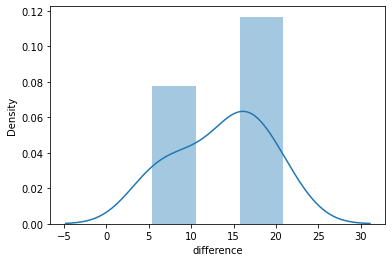

In [20]:
sn.distplot(all_df[all_df['type'] == 'Maryland']['difference'])

#### Youngest

In [8]:
hispanic_df = youngest_df[youngest_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Youngest First'

med = hispanic_df['difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)


all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
7,White,145.000,0.0,487.000,73.232323,NaN,130.962,14.038,9.681379,Youngest First,0.126,1.323,0.064238,0
16,White,130.962,0.1,449.971,66.142424,NaN,117.176,13.786,10.526718,Youngest First,0.126,1.323,-0.064238,0
22,White,117.176,0.2,406.845,59.179798,NaN,103.966,13.210,11.273640,Youngest First,0.702,1.323,-0.357898,0
31,White,103.966,0.3,363.732,52.508081,NaN,91.758,12.208,11.742300,Youngest First,1.704,1.323,-0.868744,0
40,White,91.758,0.4,326.387,46.342424,NaN,79.567,12.191,13.286035,Youngest First,1.721,1.323,-0.877411,0
48,White,79.567,0.5,282.179,40.185354,NaN,72.516,7.051,8.861714,Youngest First,6.861,1.323,-3.497917,0
55,White,72.516,0.6,242.113,36.624242,NaN,57.662,14.854,20.483755,Youngest First,0.942,1.323,0.480256,0
65,White,57.662,0.7,193.757,29.122222,NaN,41.570,16.092,27.907461,Youngest First,2.180,1.323,1.111421,0
71,White,41.570,0.8,141.023,20.994949,NaN,23.619,17.951,43.182584,Youngest First,4.039,1.323,2.059188,0
81,White,23.619,0.9,90.302,11.928788,NaN,9.309,14.310,60.586816,Youngest First,0.398,1.323,0.202911,0


#### Max Life Years

In [9]:
hispanic_df = max_lives_df[max_lives_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Max Life Years'

med = hispanic_df['difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)


all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
6,White,145.000,0.0,487.000,73.232323,NaN,130.112,14.888,10.267586,Max Life Years,0.963,2.712,0.239507,0
16,White,130.112,0.1,432.386,65.713131,NaN,116.228,13.884,10.670807,Max Life Years,0.041,2.712,-0.010197,0
24,White,116.228,0.2,382.825,58.701010,NaN,98.624,17.604,15.146092,Max Life Years,3.679,2.712,0.915002,0
31,White,98.624,0.3,330.027,49.810101,NaN,84.658,13.966,14.160853,Max Life Years,0.041,2.712,0.010197,0
38,White,84.658,0.4,288.270,42.756566,NaN,71.649,13.009,15.366534,Max Life Years,0.916,2.712,-0.227818,0
46,White,71.649,0.5,252.318,36.186364,NaN,62.688,8.961,12.506804,Max Life Years,4.964,2.712,-1.234594,0
54,White,62.688,0.6,212.753,31.660606,NaN,45.906,16.782,26.770674,Max Life Years,2.857,2.712,0.710563,0
62,White,45.906,0.7,162.949,23.184848,NaN,26.131,19.775,43.077158,Max Life Years,5.850,2.712,1.454950,0
70,White,26.131,0.8,108.336,13.197475,NaN,14.773,11.358,43.465616,Max Life Years,2.567,2.712,-0.638437,0
79,White,14.773,0.9,72.093,7.461111,NaN,9.261,5.512,37.311311,Max Life Years,8.413,2.712,-2.092393,0


#### Sickest First

In [10]:
hispanic_df = sickest_df[sickest_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Sickest First'


med = hispanic_df['difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)


all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
7,White,145.000,0.0,487.000,73.232323,NaN,143.272,1.728,1.191724,Sickest First,14.148,1.0205,-9.351128,0
15,White,143.272,0.1,454.482,72.359596,NaN,126.385,16.887,11.786672,Sickest First,1.011,1.0205,0.668221,0
24,White,126.385,0.2,413.206,63.830808,NaN,110.392,15.993,12.654192,Sickest First,0.117,1.0205,0.077331,0
30,White,110.392,0.3,369.298,55.753535,NaN,99.127,11.265,10.204544,Sickest First,4.611,1.0205,-3.047643,0
40,White,99.127,0.4,319.314,50.064141,NaN,89.139,9.988,10.075963,Sickest First,5.888,1.0205,-3.891677,0
49,White,89.139,0.5,280.011,45.019697,NaN,72.318,16.821,18.870528,Sickest First,0.945,1.0205,0.624598,0
59,White,72.318,0.6,234.317,36.524242,NaN,55.412,16.906,23.377306,Sickest First,1.030,1.0205,0.680779,0
63,White,55.412,0.7,190.084,27.985859,NaN,39.048,16.364,29.531509,Sickest First,0.488,1.0205,0.322544,0
70,White,39.048,0.8,142.671,19.721212,NaN,23.289,15.759,40.358021,Sickest First,0.117,1.0205,-0.077331,0
81,White,23.289,0.9,91.131,11.762121,NaN,9.316,13.973,59.998282,Sickest First,1.903,1.0205,-1.257789,0


/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Difference Plot For White Patients')

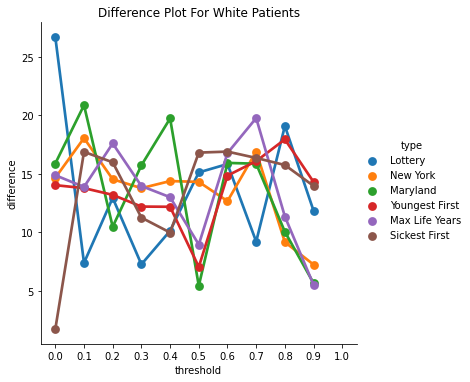

In [11]:
all_df = pd.concat(all_df_list)
type_labels = all_df['type'].unique()
sn_plot = sn.factorplot(x='threshold', y='difference', 
                        hue_order = type_labels, hue='type', data=all_df)
plt.title('Difference Plot For White Patients')

In [12]:
all_df[all_df['type'] == 'Lottery']

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
8,White,145.000,0.0,487.000,73.232323,NaN,118.299,26.701,18.414483,Lottery,14.3025,3.3145,2.910556,0
15,White,118.299,0.1,437.899,59.746970,NaN,110.905,7.394,6.250264,Lottery,5.0045,3.3145,-1.018415,0
23,White,110.905,0.2,400.117,56.012626,NaN,97.955,12.950,11.676660,Lottery,0.5515,3.3145,0.112230,0
30,White,97.955,0.3,360.875,49.472222,NaN,90.686,7.269,7.420754,Lottery,5.1295,3.3145,-1.043852,0
39,White,90.686,0.4,318.644,45.801010,NaN,80.549,10.137,11.178131,Lottery,2.2615,3.3145,-0.460215,0
46,White,80.549,0.5,272.878,40.681313,NaN,65.421,15.128,18.781115,Lottery,2.7295,3.3145,0.555453,0
55,White,65.421,0.6,222.977,33.040909,NaN,49.578,15.843,24.216995,Lottery,3.4445,3.3145,0.700955,0
62,White,49.578,0.7,177.051,25.039394,NaN,40.364,9.214,18.584856,Lottery,3.1845,3.3145,-0.648045,0
71,White,40.364,0.8,124.517,20.385859,NaN,21.268,19.096,47.309484,Lottery,6.6975,3.3145,1.362940,0
78,White,21.268,0.9,74.190,10.741414,NaN,9.421,11.847,55.703404,Lottery,0.5515,3.3145,-0.112230,0


Text(0.5, 1.0, 'Difference Plot For White Patients')

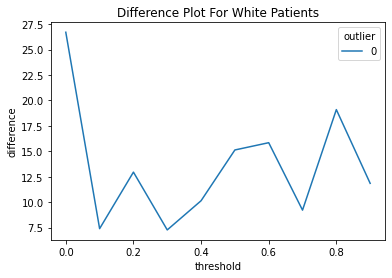

In [14]:
type_labels = all_df['type'].unique()
sn_plot = sn.lineplot(x='threshold', y='difference', 
                        hue='outlier', 
                      data=all_df[all_df['type'] == 'Lottery'])
plt.title('Difference Plot For White Patients Lottery')

Text(0.5, 1.0, 'Difference Plot For White Patients New York')

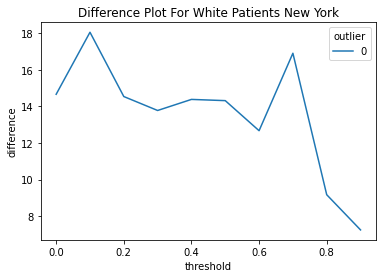

In [15]:
sn_plot = sn.lineplot(x='threshold', y='difference', 
                        hue='outlier', 
                      data=all_df[all_df['type'] == 'New York'])
plt.title('Difference Plot For White Patients New York')

Text(0.5, 1.0, 'Difference Plot For White Patients Maryland')

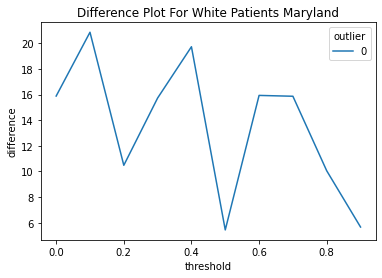

In [16]:
sn_plot = sn.lineplot(x='threshold', y='difference', 
                        hue='outlier', 
                      data=all_df[all_df['type'] == 'Maryland'])
plt.title('Difference Plot For White Patients Maryland')

Text(0.5, 1.0, 'Difference Plot For White Patients Youngest First')

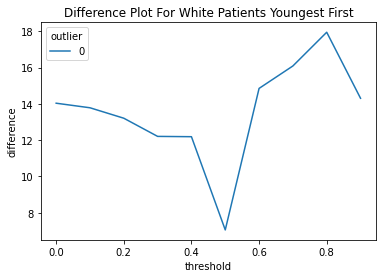

In [17]:
sn_plot = sn.lineplot(x='threshold', y='difference', 
                        hue='outlier', 
                      data=all_df[all_df['type'] == 'Youngest First'])
plt.title('Difference Plot For White Patients Youngest First')

Text(0.5, 1.0, 'Difference Plot For White Patients Max Life Years')

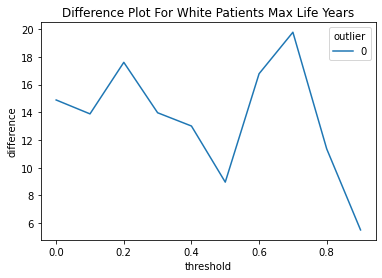

In [18]:
sn_plot = sn.lineplot(x='threshold', y='difference', 
                        hue='outlier', 
                      data=all_df[all_df['type'] == 'Max Life Years'])
plt.title('Difference Plot For White Patients Max Life Years')

Text(0.5, 1.0, 'Difference Plot For White Patients Sickest First')

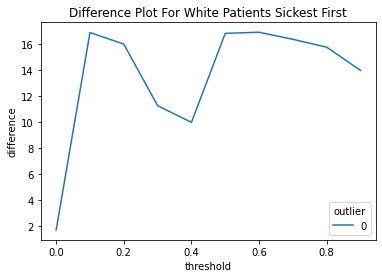

In [19]:
sn_plot = sn.lineplot(x='threshold', y='difference', 
                        hue='outlier', 
                      data=all_df[all_df['type'] == 'Sickest First'])
plt.title('Difference Plot For White Patients Sickest First')